# Анализ рынка видеоигр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br>
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.<br>
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных: <br>

* Name — название игры <br>
* Platform — платформа <br>
* Year_of_Release — год выпуска <br>
* Genre — жанр игры <br>
* NA_sales — продажи в Северной Америке (миллионы проданных копий)<br>
* EU_sales — продажи в Европе (миллионы проданных копий)<br>
* JP_sales — продажи в Японии (миллионы проданных копий)<br>
* Other_sales — продажи в других странах (миллионы проданных копий)<br>
* Critic_Score — оценка критиков (максимум 100)<br>
* User_Score — оценка пользователей (максимум 10)<br>
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br>

Данные за 2016 год могут быть неполными.

## Изучение данных из файла

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Вывод

Сразу видно несколько задач:<br>
1) Следует переименовать названия всех столбцов<br>
2) Оптимизировать и исправить типы данных <br>
3) В рейтинговых столбцах много пропусков. В основном для старых игр, что логично. Агрегаторов оценок в те года не было, а игровая пресса не столь распространена. NaNы оставим на месте. Заменять нулями было бы неправильно.

## Подготовка данных

Приведем названия столбцов к нижнему регистру:

In [4]:
data.columns = map(str.lower, data.columns)

Оптимизируем типы данных:<br>
year_of_release переводим в Int16 из-за наличия пропусков в данных. Для подсчёта продаж нам эти данные пригодятся, а при выборе года для прогноза они автоматически отсекутся.

In [5]:
data = data.astype({"na_sales": "float16", "eu_sales": "float16", "jp_sales": "float16", "other_sales": "float16", 
                    "critic_score": "Int16", "year_of_release":"Int16"}) 

Посмотрим на таинственный 'tbd'. Судя по всему, это значит, что "количества пользовательских рейтингов недостаточно, чтобы выставить оценку". Т.е. по факту это NaN

In [6]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.449219,2.589844,0.0,0.660156,<NA>,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.080078,1.349609,0.0,0.540039,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.509766,1.030273,0.0,0.270020,<NA>,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.650391,0.569824,0.0,0.199951,71,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.150391,0.180054,0.0,0.070007,73,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.010002,0.000000,0.0,0.000000,67,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.010002,0.000000,0.0,0.000000,53,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.010002,0.000000,0.0,0.000000,48,tbd,E
16704,Plushees,DS,2008,Simulation,0.010002,0.000000,0.0,0.000000,<NA>,tbd,E


In [7]:
data['user_score'] = data['user_score'].replace({'tbd': np.nan})
data = data.astype({"user_score": "float16"})

Теперь посмотрим на две игры без имени и жанра.

In [8]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.780273,0.529785,0.000000,0.080017,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.000000,0.000000,0.029999,0.000000,<NA>,NaN,NaN


Совершенно непонятно, что это за игры, поэтому стоит удалить их из выборки.

In [9]:
data.drop([4127, 16230, 659, 12244], inplace = True)
data = data.reset_index(drop = True)

In [10]:
data['rating'] = data['rating'].fillna('Unknown')

Добавил классификацию "Unknown". Просмотрел пропущенные значения, там явно игры абсолютно разных возрастных рейтингов.

Посчитаем суммарные продажи и запишем их в отдельный :

In [11]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Проверим наличие дубликатов.

In [12]:
data[data.duplicated()] #проверяем полные дубли

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


In [13]:
data[data.duplicated(subset=['name', 'platform'])] # проверяем дубли по названию

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1590,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.130005,0.020004,0.099976,83,8.5,T,1.249023
11713,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.059998,0.000000,0.020004,82,8.5,T,0.080017


Полных дублей не оказалось.<br>
Проверил дубли по имени и платформе. Попадания есть.<br>
Но в случае с Most Wanted - это на самом деле разные игры.<br>
А вот лишнего Соника и НФЛ пришлось удалить.

##  Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. Это интересная информация, но нам вряд ли пригодится для решения поставленной задачи.

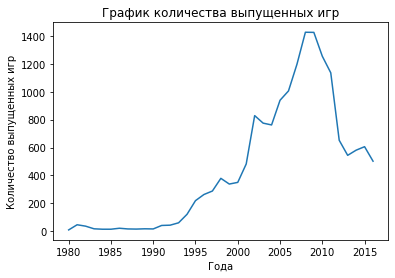

In [14]:
plt.plot(data.groupby('year_of_release')['name'].agg('count'))
plt.xlabel('Года')
plt.ylabel('Количество выпущенных игр')
plt.title('График количества выпущенных игр')
plt.show()

Посмотрим, как менялись продажи по платформам.

In [15]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1256.000000
X360     971.500000
PS3      939.000000
Wii      907.500000
DS       806.000000
PS       731.000000
GBA      317.750000
PS4      314.250000
PSP      294.000000
PC       259.500000
3DS      259.000000
XB       257.750000
GB       255.500000
NES      251.000000
N64      218.625000
SNES     200.000000
GC       199.000000
XOne     159.250000
2600      96.937500
WiiU      82.187500
PSV       54.062500
SAT       33.593750
GEN       28.375000
DC        15.945312
SCD        1.860352
NG         1.439453
WS         1.419922
TG16       0.160034
3DO        0.099976
GG         0.040009
PCFX       0.029999
Name: total_sales, dtype: float16

Выберем платформы с наибольшими суммарными продажами (X360, PS2, PS3) и построим распределение по годам, определим за какой характерный срок появляются новые и исчезают старые платформы.

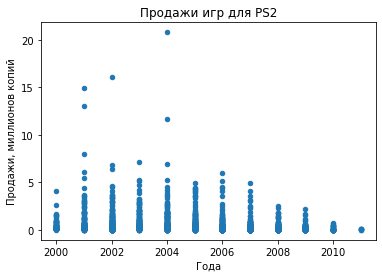

In [16]:
data[data['platform'] == 'PS2'].plot(x='year_of_release', y='total_sales', kind='scatter')
plt.xlabel('Года')
plt.ylabel('Продажи, миллионов копий')
plt.title('Продажи игр для PS2')
plt.show()

In [17]:
data[data['platform'] == "PS2"].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

,total_sales
year_of_release,
2000,39.156250
2001,166.375000
2002,205.375000
2003,184.375000
2004,211.750000
2005,160.625000
2006,103.437500
2007,76.000000
2008,53.906250


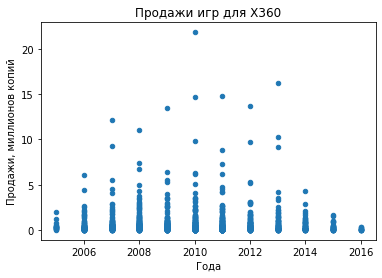

In [18]:
data[data['platform'] == 'X360'].plot(x='year_of_release', y='total_sales', kind='scatter')
plt.xlabel('Года')
plt.ylabel('Продажи, миллионов копий')
plt.title('Продажи игр для X360')
plt.show()

In [19]:
data[data['platform'] == "X360"].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

,total_sales
year_of_release,
2005,8.250000
2006,51.625000
2007,95.375000
2008,135.250000
2009,120.250000
2010,170.000000
2011,143.875000
2012,99.750000
2013,88.562500


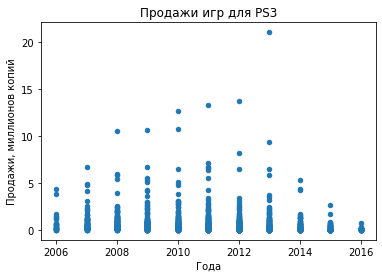

In [20]:
data[data['platform'] == 'PS3'].plot(x='year_of_release', y='total_sales', kind='scatter')
plt.xlabel('Года')
plt.ylabel('Продажи, миллионов копий')
plt.title('Продажи игр для PS3')
plt.show()

In [21]:
data[data['platform'] == "PS3"].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

,total_sales
year_of_release,
2006,20.968750
2007,73.187500
2008,118.500000
2009,130.875000
2010,142.125000
2011,156.750000
2012,107.375000
2013,113.250000
2014,47.750000


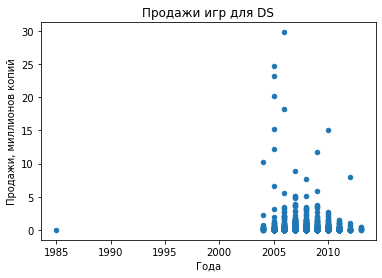

In [22]:
data[data['platform'] == 'DS'].plot(x='year_of_release', y='total_sales', kind='scatter')
plt.xlabel('Года')
plt.ylabel('Продажи, миллионов копий')
plt.title('Продажи игр для DS')
plt.show()

In [23]:
data[data['platform'] == "DS"].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

,total_sales
year_of_release,
1985,0.020004
2004,17.265625
2005,130.125000
2006,119.812500
2007,147.000000
2008,145.250000
2009,119.562500
2010,85.000000
2011,26.187500


Из данных графиков видно, что жизненный цикл консоли - 10 лет, из них активный цикл - 7 лет.<br>

In [24]:
data.loc[15954, 'year_of_release'] = 2010

В дальнейшем работаем с актуальным срезом данным, исходя из активного срока жизний консолей, определенного выше.

In [25]:
data_actual = data[data['year_of_release'] >= 2010]

Проанализируем актуальный период:

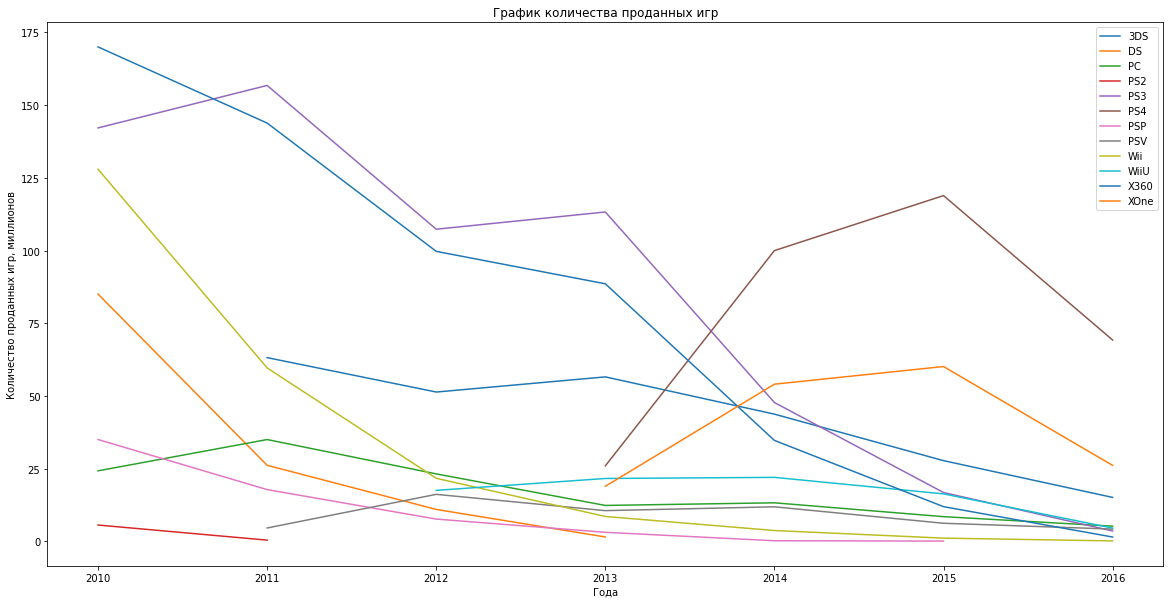

In [26]:
data_actual = data_actual.astype({"total_sales": "float64"}) # иначе падает в ошибку, связанную с float16
plt.figure(figsize=(20, 10))
year_group = data_actual.pivot_table(index = ['year_of_release'], columns = ['platform'], 
                                 values = ['total_sales'], aggfunc = ['sum'])
plt.plot(year_group)
plt.xlabel('Года')
plt.ylabel('Количество проданных игр, миллионов')
plt.title('График количества проданных игр')
plt.legend(['3DS','DS','PC','PS2','PS3','PS4','PSP','PSV','Wii','WiiU','X360','XOne']) 
plt.show()

In [27]:
data_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.000000,4.890625,0.239990,1.690430,61,6.300781,E,21.812500
16,Grand Theft Auto V,PS3,2013,Action,7.019531,9.093750,0.979980,3.960938,97,8.203125,M,21.062500
23,Grand Theft Auto V,X360,2013,Action,9.656250,5.140625,0.059998,1.410156,97,8.101562,M,16.265625
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.511719,3.169922,5.648438,0.799805,<NA>,NaN,Unknown,15.125000
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.039062,4.238281,0.130005,1.320312,88,3.400391,M,14.734375
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,Strawberry Nauts,PSV,2016,Adventure,0.000000,0.000000,0.010002,0.000000,<NA>,NaN,Unknown,0.010002
16703,Aiyoku no Eustia,PSV,2014,Misc,0.000000,0.000000,0.010002,0.000000,<NA>,NaN,Unknown,0.010002
16706,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.000000,0.000000,0.010002,0.000000,<NA>,NaN,Unknown,0.010002
16708,Haitaka no Psychedelica,PSV,2016,Adventure,0.000000,0.000000,0.010002,0.000000,<NA>,NaN,Unknown,0.010002


Итак, мы видим, что 3DS, DS, PS2, PS3, PSP, Wii и X360 уже отжили своё. Мы не можем считать их за актуальные платформы. <br>
Также мы видим, что WiiU и PSV не нашли своих аудиторий.<br>
В 2017 году я бы поставил на XOne и PS4.<br>
PC - отдельный ситуация, на платформе 95% продаж в цифре, а здесь цифра не учитывается.

Построим ящик с усами.

Text(0, 0.5, 'Продажи, миллионов копий')

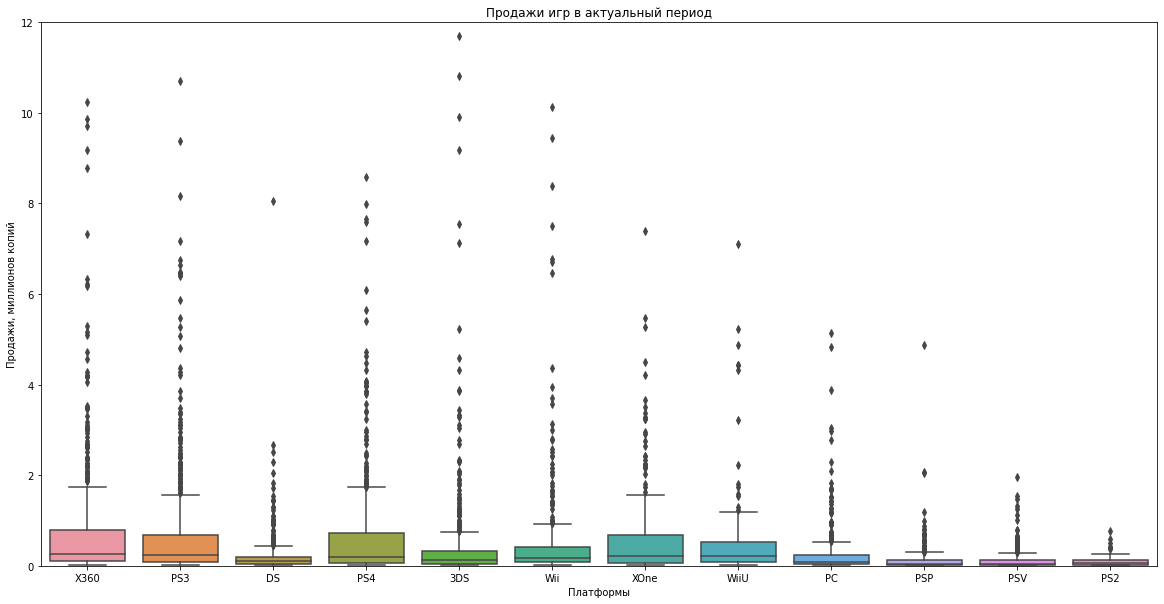

In [28]:
plt.figure(figsize=(20, 10))
plt.title('Продажи игр в актуальный период')
plt.ylim([0,12])
sns.boxplot(x = data_actual["platform"], y = data_actual["total_sales"])
plt.xlabel('Платформы')
plt.ylabel('Продажи, миллионов копий')

Видно, что в актуальный период наибольшим тиражом продались игры на X360, PS3 и DS. А также, что PS4 уже на 4-м месте, хотя вышла позже всех конкурентов.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [29]:
data_actual[data_actual['platform'] == 'X360']['critic_score'].astype('float16').corr(data_actual['total_sales'])

0.3400969599051333

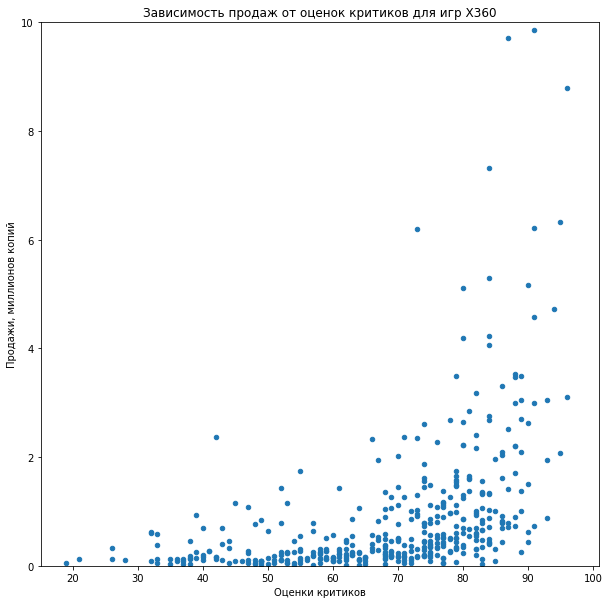

In [30]:
data_actual[data_actual['platform'] == 'X360'].plot(x='critic_score', y='total_sales', kind='scatter', figsize = (10, 10))
plt.ylim([0,10])
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи, миллионов копий')
plt.title('Зависимость продаж от оценок критиков для игр X360')
plt.show()

In [31]:
data_actual[data_actual['platform'] == 'X360']['user_score'].corr(data_actual['total_sales'])

0.06606338667002236

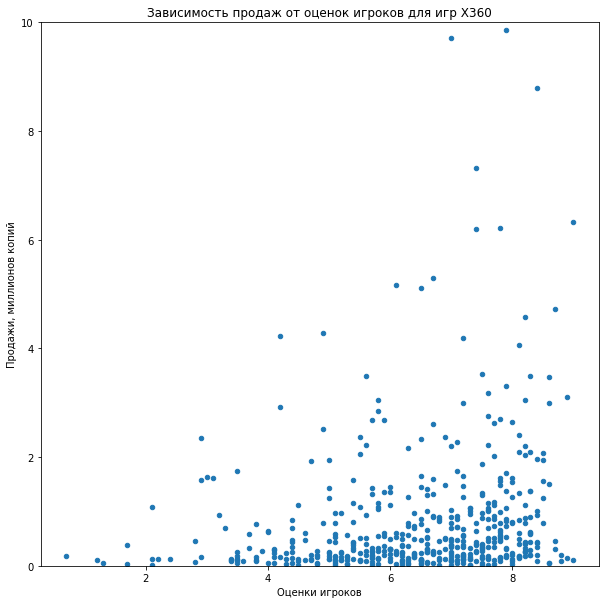

In [32]:
data_actual[data_actual['platform'] == 'X360'].plot(x='user_score', y='total_sales', kind='scatter', figsize = (10, 10))
plt.xlabel('Оценки игроков')
plt.ylim([0,10])
plt.ylabel('Продажи, миллионов копий')
plt.title('Зависимость продаж от оценок игроков для игр X360')
plt.show()

Интересные выводы. <br>
Связь между оценками критиков и продажами всё-таки существует. А вот мнение игроков мало на это влияет. <br>
Но стоит посмотреть, как обстоят дела с какой-нибудь другой платформой. Например, PS4.

In [33]:
data_actual[data_actual['platform'] == 'PS4']['critic_score'].astype('float16').corr(data_actual['total_sales'])

0.4065802406899804

In [34]:
data_actual[data_actual['platform'] == 'PS4']['user_score'].astype('float16').corr(data_actual['total_sales'])

-0.03201493087451782

С новым поколением тенденция не только сохраняется, но и немного усиливается. Оценки критиков всё больше влияют на продажи, а мнение игроков всё меньше, а негативный фон может даже принести дополнительные продажи.

Посмотрим на распределение игр по жанрам.

In [35]:
data_actual.groupby('genre')['total_sales'].agg({'count', 'sum', 'median'}).sort_values(by='sum', ascending = False)

,sum,count,median
genre,,,
Action,673.131126,1496,0.140015
Shooter,479.732307,410,0.385132
Sports,328.359108,574,0.199951
Role-Playing,315.271393,568,0.150024
Misc,234.566887,576,0.130005
Racing,122.681305,237,0.169922
Platform,119.733772,153,0.209961
Fighting,81.589104,199,0.180054
Simulation,71.747498,217,0.100037


Экшены и шутеры наше всё. А вот паззлы и стратегии мало интересуют публику. <br>
Довольно правдоподобный результат. 

##  Региональные портреты геймеров

Определим для пользователя каждого региона (NA, EU, JP) cамые популярные платформы:

In [36]:
data_actual.groupby('platform')['na_sales'].agg('sum').sort_values(ascending = False)

platform
X360    334.250000
PS3     229.250000
Wii     121.187500
PS4     108.750000
XOne     93.125000
3DS      82.625000
DS       59.656250
PC       39.062500
WiiU     38.093750
PSV      12.468750
PSP       9.648438
PS2       2.320312
Name: na_sales, dtype: float16

In [37]:
data_actual.groupby('platform')['eu_sales'].agg('sum').sort_values(ascending = False)

platform
PS3     213.625000
X360    163.375000
PS4     141.125000
PC       68.812500
Wii      65.937500
3DS      61.281250
XOne     51.593750
DS       28.062500
WiiU     25.125000
PSV      13.070312
PSP       7.589844
PS2       1.669922
Name: eu_sales, dtype: float16

In [38]:
data_actual.groupby('platform')['jp_sales'].agg('sum').sort_values(ascending = False)

platform
3DS     100.625000
PS3      59.250000
PSP      42.187500
DS       27.921875
PSV      21.843750
Wii      17.750000
PS4      15.960938
WiiU     13.007812
X360      5.460938
PS2       0.799805
XOne      0.340088
PC        0.000000
Name: jp_sales, dtype: float16

Похоже, американцы предпочитают Xbox, европейцы - PS, а японцы - портативные консоли от Nintendo. <br>
Американские рынок самый большой, японский - самый маленький. Но доля геймеров в Японии явно выше, чем в США и Европе.

Определим самые популярные жанры для каждого региона.

In [39]:
data_actual.groupby('genre')['na_sales'].agg('sum').sort_values(ascending = False)

genre
Action          290.750000
Shooter         237.500000
Sports          156.750000
Misc            123.812500
Role-Playing    112.062500
Platform         54.906250
Racing           46.125000
Fighting         39.062500
Simulation       26.390625
Adventure        20.843750
Strategy         13.250000
Puzzle            9.101562
Name: na_sales, dtype: float16

In [40]:
data_actual.groupby('genre')['eu_sales'].agg('sum').sort_values(ascending = False)

genre
Action          233.625000
Shooter         171.500000
Sports          116.812500
Role-Playing     75.500000
Misc             66.062500
Racing           54.750000
Platform         38.312500
Simulation       26.390625
Fighting         20.328125
Adventure        18.875000
Strategy         12.492188
Puzzle            6.582031
Name: eu_sales, dtype: float16

In [41]:
data_actual.groupby('genre')['jp_sales'].agg('sum').sort_values(ascending = False)

genre
Role-Playing    103.562500
Action           72.250000
Misc             24.296875
Platform         15.812500
Adventure        15.671875
Sports           15.507812
Shooter          14.039062
Fighting         13.898438
Simulation       13.304688
Strategy          6.800781
Racing            6.679688
Puzzle            3.400391
Name: jp_sales, dtype: float16

Здесь мы видим, что американцы и европейцы предпочитают шутеры и экшены, а вот японцы - РПГ.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [42]:
data_actual.groupby('rating')['na_sales'].agg('sum').sort_values(ascending = False)

rating
M          382.250000
E          271.250000
T          160.750000
E10+       159.375000
Unknown    155.750000
EC           1.129883
RP           0.000000
Name: na_sales, dtype: float16

In [43]:
data_actual.groupby('rating')['eu_sales'].agg('sum').sort_values(ascending = False)

rating
M          292.000000
E          197.375000
Unknown    139.500000
T          113.062500
E10+        99.250000
RP           0.029999
EC           0.000000
Name: eu_sales, dtype: float16

In [44]:
data_actual.groupby('rating')['jp_sales'].agg('sum').sort_values(ascending = False)

rating
Unknown    171.500000
E           47.875000
T           42.125000
M           30.453125
E10+        13.218750
EC           0.000000
RP           0.000000
Name: jp_sales, dtype: float16

Вывод: пропущенных значений довольно много.<br>
В случае с Европой и Японии, возможно, из-за того, что система ESRB - американская, а в этих регионах свои рейтинговые агентства.

И вновь мы видим схожесть рынка в Европе и США - предпочитают игры для взрослых (M), а Япония - игры для любого возраста (E).

##  Проверка гипотез

Проверим гипотезы согласно заданию.

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.<br>
Альтернативная гипотеза - средние пользовательские рейтинге платформ отличаются.

In [45]:
xbox_games = data_actual[(data_actual['platform'] == 'XOne') & (~data_actual['user_score'].isna())] #определяем выборки
pc_games = data_actual[(data_actual['platform'] == 'PC') & (~data_actual['user_score'].isna())]

In [46]:
alpha = 0.05 # примем стандартный уровень критической значимости
results = st.ttest_ind(
    xbox_games['user_score'], 
    pc_games['user_score']) # найдем p-значение
results.pvalue

0.9771421555211608

In [47]:
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Не получилось отвергнуть нулевую гипотезу


2) Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые. <br>
Альтернативная гипотеза: средние пользовательские рейтинги разные.

In [48]:
action_games = data_actual[(data_actual['genre'] == 'Action') & (~data_actual['user_score'].isna())] #определяем выборки
sport_games = data_actual[(data_actual['genre'] == 'Sports') & (~data_actual['user_score'].isna())]

In [49]:
alpha = 0.05 # примем стандартный уровень критической значимости
results2 = st.ttest_ind(
    action_games['user_score'], 
    sport_games['user_score']) # найдем p-значение
results2.pvalue

1.0001291442580678e-18

In [50]:
if results2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу") 
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


## Выводы

В результате выполнения проекта произведена предобработка данных: оптимизированы типы, переименованы столбцы, проверено наличие дубликатов.

Проведен анализ количества игр с 1980 по 2016, проанализированы продажи по платформам, построен график с распределением по годам. Определён полный жизненный цикл консоли - 10 лет и активный цикл - 7 лет.

По данным 7-летнего среза определено, что 3DS, DS, PS2, PS3, PSP, Wii и X360 прошли пики своих популярностей. <br>
Также выявлено, что WiiU и PSV не нашли своих аудиторий.<br>

В 2017 году потенциально прибыльными платформами станут XOne и PS4. <br>

Выяснено влияние отзывов на продажи игр. Отзывы критиков имеют свой вес и могут влиять на продажи, оценки пользователей влиянием не располагают.

Определены самые прибыльные жанры: на долю экшенов , шутеров и спортивных игр приходится более половины рынка - около полутора миллиарда проданных коробок. <br>

Проведен региональный анализ рынка. Американцы предпочитают Xbox (334 миллиона проданных игр), из игр - шутеры и экшены (237 млн. и 290 млн. соотв), европейцы - PS (213 млн.) и также шутеры (133 млн.) и экшены (231 млн.), а вот японцы - портативные консоли от Nintendo (100 млн.) и ролевые игры (103 млн.). <br>
Американские рынок самый большой, японский - самый маленький. Но доля геймеров в Японии явно выше, чем в США и Европе.<br>

В США и Европе больше популярны игры с рейтингом М, а Япония предпочитает игры для всех возрастов с рейтингом Е.<br>

Проверены и принята гипотеза о равенстве cреднего пользовательского рейтинга платформ Xbox One и PC, отвергнута - о равенстве средних пользовательских рейтингов жанров Action и Sports. <br>